In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Dataset/sign_mnist_train.csv')
test = pd.read_csv('Dataset/sign_mnist_test.csv')

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [5]:
train_set = np.array(train, dtype =float)
test_set = np.array(test, dtype=float)
train_set

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]])

In [6]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

In [7]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


(-0.5, 27.5, 27.5, -0.5)

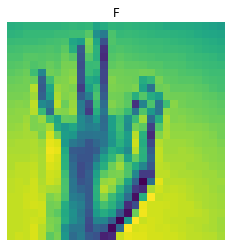

In [8]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [9]:
# Prepare the training and testing dataset 
# Normalize the data
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

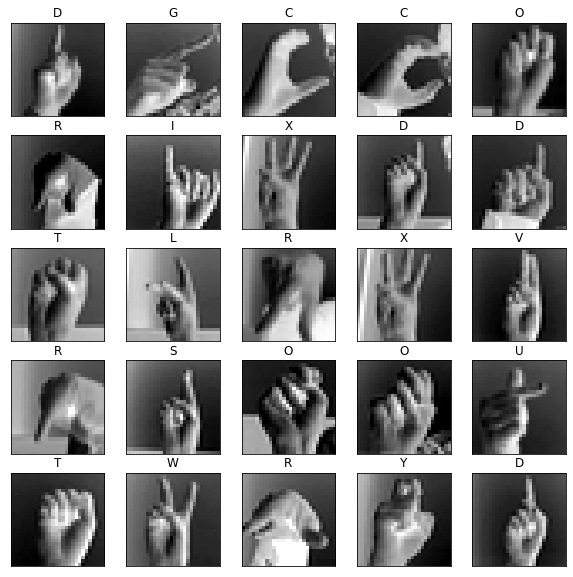

In [10]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [11]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(21964, 784)
(21964,)
(5491, 784)
(5491,)


In [13]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(7172, 28, 28, 1)
(5491, 28, 28, 1)


In [14]:
#Library for CNN Model
import keras
#print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

2022-01-14 22:35:24.355973: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-14 22:35:24.355997: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-01-14 22:35:25.542749: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-14 22:35:25.542785: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-MS-7994): /proc/driver/nvidia/version does not exist
2022-01-14 22:35:25.543021: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 F

In [15]:
#Compiling
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' ,metrics = ['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 500, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/500
43/43 [==============================] - 7s 147ms/step - loss: 3.0408 - accuracy: 0.0949 - val_loss: 2.5711 - val_accuracy: 0.2096
Epoch 2/500
43/43 [==============================] - 6s 144ms/step - loss: 2.2707 - accuracy: 0.2722 - val_loss: 1.8679 - val_accuracy: 0.3905
Epoch 3/500
43/43 [==============================] - 6s 136ms/step - loss: 1.6567 - accuracy: 0.4598 - val_loss: 1.3589 - val_accuracy: 0.5671
Epoch 4/500
43/43 [==============================] - 6s 134ms/step - loss: 1.2653 - accuracy: 0.5795 - val_loss: 1.0303 - val_accuracy: 0.6757
Epoch 5/500
43/43 [==============================] - 6s 134ms/step - loss: 0.9526 - accuracy: 0.6778 - val_loss: 0.7715 - val_accuracy: 0.7478
Epoch 6/500
43/43 [==============================] - 6s 133ms/step - loss: 0.7419 - accuracy: 0.7482 - val_loss: 0.6024 - val_accuracy: 0.8073
Epoch 7/500
43/43 [==============================] - 6s 134ms/step - loss: 0.5727 - accuracy: 0.8090 - val_loss: 0.4486 - val_accuracy: 0.8532

Epoch 58/500
43/43 [==============================] - 6s 134ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 59/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 60/500
43/43 [==============================] - 6s 136ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 61/500
43/43 [==============================] - 6s 134ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 62/500
43/43 [==============================] - 6s 133ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 7.2310e-04 - val_accuracy: 0.9996
Epoch 63/500
43/43 [==============================] - 6s 135ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 8.2738e-04 - val_accuracy: 0.9998
Epoch 64/500
43/43 [==============================] - 6s 135ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.0010 - val_a

Epoch 113/500
43/43 [==============================] - 6s 136ms/step - loss: 2.2712e-04 - accuracy: 1.0000 - val_loss: 5.2205e-05 - val_accuracy: 1.0000
Epoch 114/500
43/43 [==============================] - 6s 134ms/step - loss: 2.9316e-04 - accuracy: 1.0000 - val_loss: 6.0325e-05 - val_accuracy: 1.0000
Epoch 115/500
43/43 [==============================] - 6s 135ms/step - loss: 1.4206e-04 - accuracy: 1.0000 - val_loss: 5.7892e-05 - val_accuracy: 1.0000
Epoch 116/500
43/43 [==============================] - 6s 135ms/step - loss: 2.0876e-04 - accuracy: 1.0000 - val_loss: 2.7335e-05 - val_accuracy: 1.0000
Epoch 117/500
43/43 [==============================] - 6s 135ms/step - loss: 6.2266e-04 - accuracy: 0.9999 - val_loss: 6.4028e-05 - val_accuracy: 1.0000
Epoch 118/500
43/43 [==============================] - 6s 135ms/step - loss: 1.8762e-04 - accuracy: 1.0000 - val_loss: 3.2538e-05 - val_accuracy: 1.0000
Epoch 119/500
43/43 [==============================] - 6s 135ms/step - loss: 1.944

43/43 [==============================] - 6s 135ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 7.3722e-04 - val_accuracy: 0.9996
Epoch 168/500
43/43 [==============================] - 6s 135ms/step - loss: 7.1681e-04 - accuracy: 0.9999 - val_loss: 4.8656e-04 - val_accuracy: 0.9998
Epoch 169/500
43/43 [==============================] - 6s 137ms/step - loss: 3.8765e-04 - accuracy: 1.0000 - val_loss: 7.3354e-04 - val_accuracy: 0.9998
Epoch 170/500
43/43 [==============================] - 6s 136ms/step - loss: 2.4868e-04 - accuracy: 1.0000 - val_loss: 8.9683e-05 - val_accuracy: 1.0000
Epoch 171/500
43/43 [==============================] - 6s 137ms/step - loss: 1.6607e-04 - accuracy: 1.0000 - val_loss: 3.6688e-04 - val_accuracy: 0.9998
Epoch 172/500
43/43 [==============================] - 6s 137ms/step - loss: 1.4863e-04 - accuracy: 1.0000 - val_loss: 2.6977e-04 - val_accuracy: 0.9998
Epoch 173/500
43/43 [==============================] - 6s 135ms/step - loss: 2.4868e-04 - accuracy: 

Epoch 221/500
43/43 [==============================] - 6s 138ms/step - loss: 5.7722e-04 - accuracy: 0.9999 - val_loss: 1.0286e-04 - val_accuracy: 1.0000
Epoch 222/500
43/43 [==============================] - 6s 135ms/step - loss: 3.6147e-04 - accuracy: 1.0000 - val_loss: 7.9071e-05 - val_accuracy: 1.0000
Epoch 223/500
43/43 [==============================] - 6s 135ms/step - loss: 3.2215e-04 - accuracy: 1.0000 - val_loss: 5.5323e-05 - val_accuracy: 1.0000
Epoch 224/500
43/43 [==============================] - 6s 137ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0024 - val_accuracy: 0.9991
Epoch 225/500
43/43 [==============================] - 6s 136ms/step - loss: 9.1444e-04 - accuracy: 0.9998 - val_loss: 9.7061e-05 - val_accuracy: 1.0000
Epoch 226/500
43/43 [==============================] - 6s 136ms/step - loss: 3.4487e-04 - accuracy: 1.0000 - val_loss: 9.9633e-05 - val_accuracy: 1.0000
Epoch 227/500
43/43 [==============================] - 6s 136ms/step - loss: 2.5284e-04 - 

Epoch 275/500
43/43 [==============================] - 6s 131ms/step - loss: 4.4683e-05 - accuracy: 1.0000 - val_loss: 8.1113e-06 - val_accuracy: 1.0000
Epoch 276/500
43/43 [==============================] - 6s 133ms/step - loss: 4.2158e-05 - accuracy: 1.0000 - val_loss: 1.5782e-05 - val_accuracy: 1.0000
Epoch 277/500
43/43 [==============================] - 6s 130ms/step - loss: 8.2862e-05 - accuracy: 1.0000 - val_loss: 1.0623e-05 - val_accuracy: 1.0000
Epoch 278/500
43/43 [==============================] - 6s 130ms/step - loss: 1.2689e-04 - accuracy: 1.0000 - val_loss: 1.0125e-05 - val_accuracy: 1.0000
Epoch 279/500
43/43 [==============================] - 6s 130ms/step - loss: 8.1334e-05 - accuracy: 1.0000 - val_loss: 1.3872e-05 - val_accuracy: 1.0000
Epoch 280/500
43/43 [==============================] - 6s 133ms/step - loss: 6.4592e-05 - accuracy: 1.0000 - val_loss: 1.2750e-05 - val_accuracy: 1.0000
Epoch 281/500
43/43 [==============================] - 6s 131ms/step - loss: 7.427

Epoch 329/500
43/43 [==============================] - 7s 157ms/step - loss: 2.2017e-05 - accuracy: 1.0000 - val_loss: 4.1828e-06 - val_accuracy: 1.0000
Epoch 330/500
43/43 [==============================] - 7s 155ms/step - loss: 5.6819e-05 - accuracy: 1.0000 - val_loss: 7.4545e-06 - val_accuracy: 1.0000
Epoch 331/500
43/43 [==============================] - 7s 155ms/step - loss: 2.7032e-05 - accuracy: 1.0000 - val_loss: 4.7289e-06 - val_accuracy: 1.0000
Epoch 332/500
43/43 [==============================] - 7s 155ms/step - loss: 5.1202e-05 - accuracy: 1.0000 - val_loss: 7.0503e-06 - val_accuracy: 1.0000
Epoch 333/500
43/43 [==============================] - 7s 156ms/step - loss: 3.0296e-05 - accuracy: 1.0000 - val_loss: 3.3785e-06 - val_accuracy: 1.0000
Epoch 334/500
43/43 [==============================] - 7s 154ms/step - loss: 2.1533e-05 - accuracy: 1.0000 - val_loss: 2.6208e-06 - val_accuracy: 1.0000
Epoch 335/500
43/43 [==============================] - 7s 157ms/step - loss: 1.614

Epoch 383/500
43/43 [==============================] - 6s 138ms/step - loss: 5.2383e-05 - accuracy: 1.0000 - val_loss: 5.8723e-06 - val_accuracy: 1.0000
Epoch 384/500
43/43 [==============================] - 6s 140ms/step - loss: 2.1620e-05 - accuracy: 1.0000 - val_loss: 5.6006e-06 - val_accuracy: 1.0000
Epoch 385/500
43/43 [==============================] - 7s 156ms/step - loss: 1.6276e-05 - accuracy: 1.0000 - val_loss: 8.0271e-06 - val_accuracy: 1.0000
Epoch 386/500
43/43 [==============================] - 6s 151ms/step - loss: 1.6749e-05 - accuracy: 1.0000 - val_loss: 6.7447e-06 - val_accuracy: 1.0000
Epoch 387/500
43/43 [==============================] - 7s 153ms/step - loss: 1.1988e-05 - accuracy: 1.0000 - val_loss: 7.8146e-06 - val_accuracy: 1.0000
Epoch 388/500
43/43 [==============================] - 6s 135ms/step - loss: 1.3488e-05 - accuracy: 1.0000 - val_loss: 5.5355e-06 - val_accuracy: 1.0000
Epoch 389/500
43/43 [==============================] - 6s 136ms/step - loss: 7.612

Epoch 437/500
43/43 [==============================] - 6s 139ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0090 - val_accuracy: 0.9971
Epoch 438/500
43/43 [==============================] - 6s 139ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 1.7352e-04 - val_accuracy: 1.0000
Epoch 439/500
43/43 [==============================] - 6s 138ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 1.3742e-04 - val_accuracy: 1.0000
Epoch 440/500
43/43 [==============================] - 6s 140ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 1.1401e-04 - val_accuracy: 1.0000
Epoch 441/500
43/43 [==============================] - 6s 141ms/step - loss: 3.5961e-04 - accuracy: 0.9999 - val_loss: 2.6290e-05 - val_accuracy: 1.0000
Epoch 442/500
43/43 [==============================] - 6s 143ms/step - loss: 6.6443e-05 - accuracy: 1.0000 - val_loss: 2.7222e-05 - val_accuracy: 1.0000
Epoch 443/500
43/43 [==============================] - 6s 139ms/step - loss: 1.6318e-04 - accuracy: 1.

Epoch 491/500
43/43 [==============================] - 7s 170ms/step - loss: 7.8690e-06 - accuracy: 1.0000 - val_loss: 8.1998e-07 - val_accuracy: 1.0000
Epoch 492/500
43/43 [==============================] - 7s 166ms/step - loss: 3.3625e-06 - accuracy: 1.0000 - val_loss: 7.9360e-07 - val_accuracy: 1.0000
Epoch 493/500
43/43 [==============================] - 6s 145ms/step - loss: 5.3271e-06 - accuracy: 1.0000 - val_loss: 6.3256e-07 - val_accuracy: 1.0000
Epoch 494/500
43/43 [==============================] - 7s 152ms/step - loss: 5.5107e-06 - accuracy: 1.0000 - val_loss: 6.0152e-07 - val_accuracy: 1.0000
Epoch 495/500
43/43 [==============================] - 7s 156ms/step - loss: 2.2378e-05 - accuracy: 1.0000 - val_loss: 1.4791e-06 - val_accuracy: 1.0000
Epoch 496/500
43/43 [==============================] - 6s 140ms/step - loss: 8.8016e-06 - accuracy: 1.0000 - val_loss: 1.8098e-06 - val_accuracy: 1.0000
Epoch 497/500
43/43 [==============================] - 6s 140ms/step - loss: 7.444

Text(0.5, 1.0, 'Accuracy evolution')

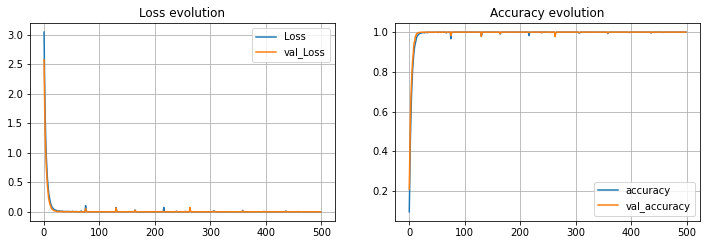

In [16]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [17]:
#Predictions for the test data
predict_x=cnn_model.predict(X_test) 
predicted_classes=np.array(np.argmax(predict_x,axis=1),dtype=float)

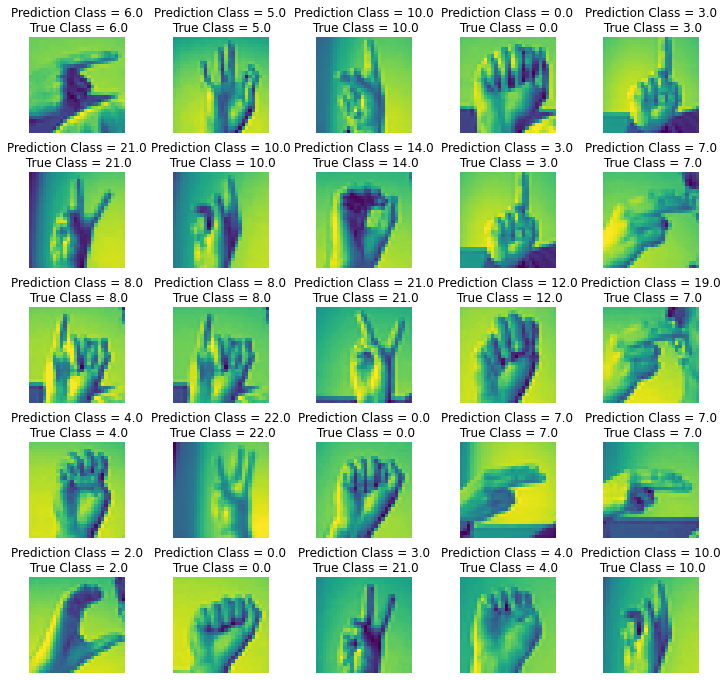

In [18]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [19]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print(f'Accuracy Score = {acc_score*100}%')

Accuracy Score = 93.83714445064139%


In [20]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
recall = recall_score(y_test, predicted_classes,pos_label='positive',average='macro')
precision = precision_score(y_test, predicted_classes,pos_label='positive',average='macro')
f1 = f1_score(y_test, predicted_classes,pos_label='positive',average='macro')
print(f'F1 score is = {round(f1,4)}')
print(f'Precision is = {round(precision,4)}')
print(f'Recall is = {round(recall,4)}')

F1 score is = 0.9308
Precision is = 0.9292
Recall is = 0.9371


/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/home/user/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [22]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

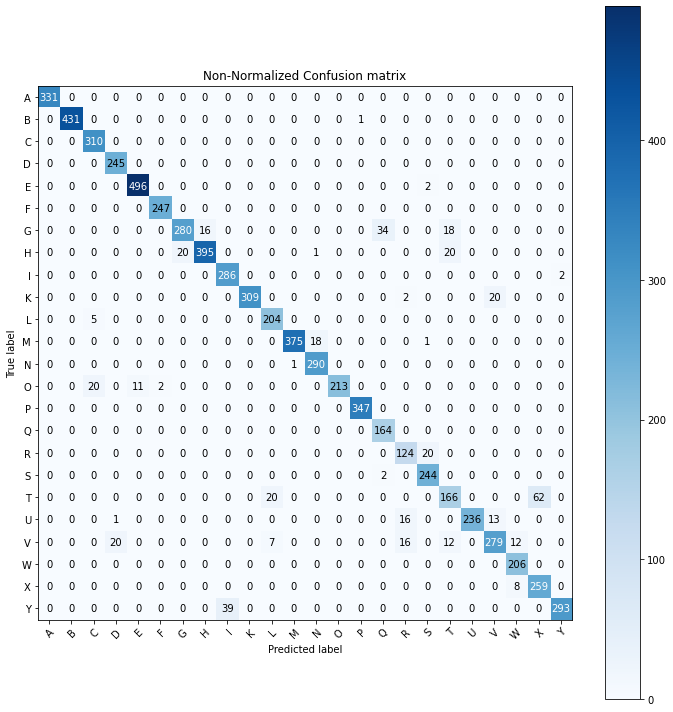

In [23]:
#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

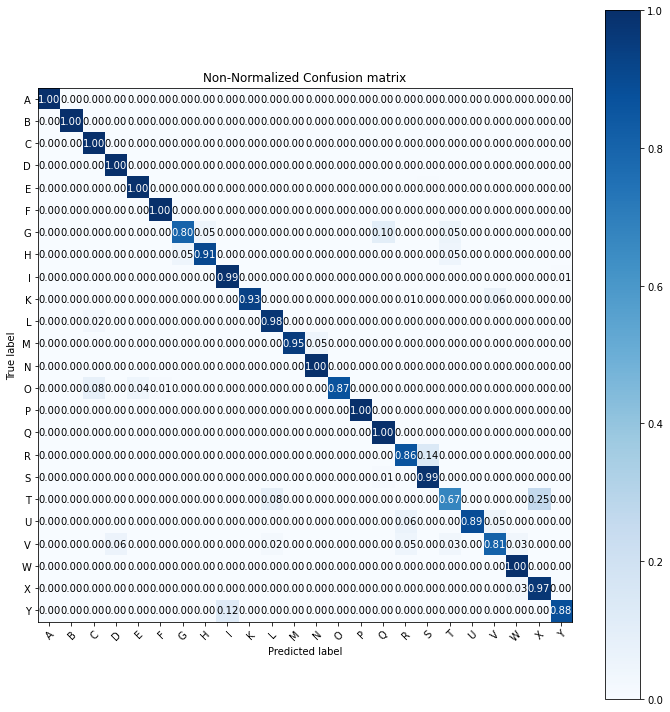

In [24]:
#Normalized Confusion Matrix
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()